In [1]:
politica = []
farandula = []
deportes = []

with open("deportes.txt") as f:
    text = f.read()
    deportes = text.split("===")

with open("farandula.txt") as f:
    text = f.read()
    farandula = text.split("===")

with open("politica.txt") as f:
    text = f.read()
    politica = text.split("===")
print(len(deportes))
print(len(farandula))
print(len(politica))


15
5
6


In [2]:
print(politica)

['\nEl mandatario de Brasil, Luiz Inácio Lula da Silva, y el presidente de Chile, Gabriel Boric, se comprometieron a superar las diferencias políticas con el presidente electo de Argentina, Javier Milei, en un aparente intento por lograr una relación de trabajo tras meses de tensión.\n\n“Vamos a tener problemas políticos en Sudamérica, pero, en lugar de quejarnos, tenemos que ser inteligentes y tratar de solucionarlos, tratar de hablar y tratar de converger democráticamente en la adversidad”, dijo Lula el martes durante un evento en la sede del Ministerio de Relaciones Exteriores de Brasil. “No me tiene que gustar el presidente de Chile, de Argentina, de Venezuela”, advirtió. “No tiene que ser mi amigo. Él tiene que ser presidente de su país y yo tengo que ser presidente del mío”.\n\nY añadió: “Nos tenemos que sentar a defender cada uno sus intereses. Sin dominio del uno sobre el otro, tenemos que llegar a un acuerdo, eso es la democracia”.\n\nLula enfatizó en la importancia de mantene

In [3]:
import spacy
import numpy as np

In [4]:
def extract_embedding(text: str, nlp: spacy.Language) -> np.ndarray:
    doc = nlp(text)
    return doc.vector

In [5]:
import spacy
nlp = spacy.load("es_core_news_md")

texts = farandula + politica + deportes
embeddings = np.array([extract_embedding(text, nlp) for text in texts])
embeddings[:4, :]

array([[ 1.329058  ,  1.5220426 ,  0.17702815, ...,  0.94201964,
        -0.19356018,  0.27211604],
       [ 1.4438628 ,  1.1611905 ,  0.13034157, ...,  0.9802628 ,
        -0.14771098,  0.15006183],
       [ 1.2221802 ,  1.1166    , -0.4134996 , ...,  1.0405263 ,
        -0.2934368 ,  0.26562253],
       [ 1.6225209 ,  1.1954594 ,  0.37872866, ...,  0.7949812 ,
        -0.21733272,  0.30316526]], dtype=float32)

In [7]:
embeddings.shape

(26, 300)

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)
embeddings_3d.shape

(26, 3)

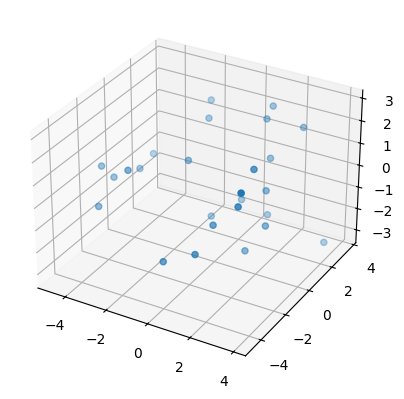

In [10]:
fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    embeddings_3d[:, 0],
    embeddings_3d[:, 1],
    embeddings_3d[:, 2],
)

In [11]:
color = [2 for i in farandula] + [3 for i in politica] + [4 for i in deportes]
color

[2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [16]:
farandula_emb = embeddings[5:11]
len(farandula)

5

In [12]:
pca2 = PCA(n_components=2)
embeddings_2d = pca2.fit_transform(embeddings)

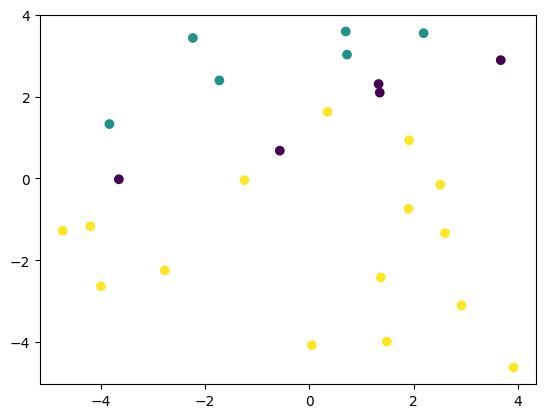

In [13]:
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1],c=color)

In [ ]:
def get_most_similar(
        query: np.ndarray, 
        embeddings: np.ndarray, 
        top_n: int = 3
    ):
    query_norm = query / np.linalg.norm(query)
    embeddings_norm = embeddings / np.linalg.norm(
                                        embeddings, 
                                        axis=1, 
                                        keepdims=True
                                        )

    similarities = np.dot(embeddings_norm, query_norm)
    similarities = np.nan_to_num(similarities)
    top_n_indices = np.argsort(similarities)[-top_n:][::-1]
    top_n_scores = similarities[top_n_indices]

    return top_n_indices, top_n_scores
